In [4]:
# import the necessary packages
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import argparse
import utils
import cv2

In [50]:
# hist = histogram, centroids = cluster centers
# returns list of primary colors sorted by number of clusters each color has
def rank_colors(hist, centroids):
    '''
    white = [255,255,255]
    yellow = [255,255,0]
    orange = [255,165,0]
    red = [255,0,0]
    brown = [165,42,42]
    gray = [128,128,128]
    purple = [128,0,128]
    green = [0,255,0]
    blue = [0,0,255]
    black = [0,0,0]
    '''
    
    colors_count = {}
    
    for (percent, color) in zip(hist, centroids):
        print(color)
        r,g,b = color
        # fill colors_count -> get the number of clusters for each color
        if (r<=192):
            if(r<=64 and g<=128 and b<=128):
                key = 'black'
            if(r<=64 and g<=128 and b>128):
                key = 'blue'
            if(r<=64 and g>128):
                key = 'green'
            if(r>64 and g<=85 and b<=85):
                key = 'brown'
            if(r>64 and g<=85 and b>85):
                key = 'purple'
            if(r>64 and g>85):
                key = 'gray'
        else:
            if(g<=82):
                key = 'red'
            else:
                if(b>128):
                    key = 'white'
                else:
                    if(g<=210):
                        key = 'orange'
                    else:
                        key = 'yellow'
        colors_count.setdefault(key, 0)
        colors_count[key]+=1
                            
    # sort colors_count by value
    ranks = sorted(colors_count.items(), key=lambda x: x[1])
    return ranks[::-1]

In [57]:

# returns list of primary colors sorted by number of pixels each color has
def rank_colors_pixels(image):
    '''
    white = [255,255,255]
    yellow = [255,255,0]
    orange = [255,165,0]
    red = [255,0,0]
    brown = [165,42,42]
    gray = [128,128,128]
    purple = [128,0,128]
    green = [0,255,0]
    blue = [0,0,255]
    black = [0,0,0]
    '''
    
    colors_count = {}
    
    for r,g,b in image:
        # fill colors_count -> get the number of clusters for each color
        if (r<=192):
            if(r<=64 and g<=128 and b<=128):
                key = 'black'
            if(r<=64 and g<=128 and b>128):
                key = 'blue'
            if(r<=64 and g>128):
                key = 'green'
            if(r>64 and g<=85 and b<=85):
                key = 'brown'
            if(r>64 and g<=85 and b>85):
                key = 'purple'
            if(r>64 and g>85):
                key = 'gray'
        else:
            if(g<=82):
                key = 'red'
            else:
                if(b>128):
                    key = 'white'
                else:
                    if(g<=210):
                        key = 'orange'
                    else:
                        key = 'yellow'
        colors_count.setdefault(key, 0)
        colors_count[key]+=1
                            
    # sort colors_count by value
    ranks = sorted(colors_count.items(), key=lambda x: x[1])
    return ranks[::-1]

In [111]:
import colorsys
# returns list of primary colors sorted by number of pixels each color has
def rank_colors_pixels_HSV(image):
    '''
    white = [255,255,255]
    yellow = [255,255,0]
    orange = [255,165,0]
    red = [255,0,0]
    brown = [165,42,42]
    gray = [128,128,128]
    purple = [128,0,128]
    green = [0,255,0]
    blue = [0,0,255]
    black = [0,0,0]
    '''
    
    colors_count = {}
    
    for r,g,b in image:
        key = ''
        hue,saturation,brightness = colorsys.rgb_to_hsv(r,g,b)
        brightness = brightness/255
        #print(hue,saturation,brightness)
        
        if (brightness < 0.2):  
            key='black'
        elif (brightness > 0.8): 
            key='white'

        #elif (hue<(30/360) and saturation<0.50):
        #    key='pink'
        elif (saturation < 0.25): 
            key='gray'
        elif (hue < (30/360)): 
            key='red'
        
        elif (hue < (90/360)): 
            key='yellow'
        elif (hue < (150/360)): 
            key='green'
        elif (hue < (210/360)): 
            key='cyan'
        elif (hue < (270/360)):
            key='blue'
        elif (hue < (330/360)): 
            key='purple'
            
       
        colors_count.setdefault(key, 0)
        colors_count[key]+=1
    
                            
    # sort colors_count by value
    ranks = sorted(colors_count.items(), key=lambda x: x[1])
    return ranks[::-1]

In [2]:
import colorsys
# returns list of primary colors sorted by number of pixels each color has
def rank_colors_pixels_HSV2(image):
    '''
    white = [255,255,255]
    yellow = [255,255,0]
    orange = [255,165,0]
    red = [255,0,0]
    brown = [165,42,42]
    gray = [128,128,128]
    purple = [128,0,128]
    green = [0,255,0]
    blue = [0,0,255]
    black = [0,0,0]
    '''
    
    colors_count = {}
    
    for r,g,b in image:
        key = ''
        hue,saturation,brightness = colorsys.rgb_to_hsv(r,g,b)
        brightness = brightness/255
        hue = hue*360
        #print(hue,saturation,brightness)
        
        if (saturation > 0.075 and saturation<=0.1) and (brightness>0.3 and brightness<=0.6):
            key='gray'
        elif (saturation > 0.05 and saturation<=0.075) and (brightness>0.3 and brightness<=0.75):
            key='gray'
        elif (saturation > 0 and saturation<=0.05) and (brightness>0.3 and brightness<=0.8):
            key='gray'
        elif (brightness>0 and brightness<=0.2):
            key='black'
        elif (saturation > 0 and saturation<=0.5) and (brightness>0.8 and brightness<=1.0):
            key='white'
        elif (hue>15 and hue<=45) and (saturation > 0.2 and saturation<=0.8) and (brightness>0.3 and brightness<=0.8):
            if (brightness>0.3 and brightness <= 0.5):
                key='dark brown'
            else:
                key='light brown'
        elif (hue>30 and hue<=45) and (saturation > 0.3 and saturation<=0.8) and (brightness>0.3 and brightness<=0.8):
            if (brightness>0.3 and brightness <= 0.5):
                key='dark brown'
            else:
                key='light brown'
        elif (hue>330 and hue<=360) and (saturation > 0.3 and saturation<=1.0) and (brightness>0.3 and brightness<=0.4):
            key='dark brown'

            
       
        elif (hue>0 and hue<=15) or (hue>345 and hue<=360):
            key='red'
        elif (hue>295 and hue<=345):
            key='pink'
        elif (hue>265 and hue<=295):
            key='purple'
        elif (hue>165 and hue<=265):
            key='blue'
        elif (hue>65 and hue<=165):
            key='green'
        '''
        elif (hue>45 and hue<=65):
            key='yellow'
        elif (hue>15 and hue<=45):
            key='orange'
        '''
    
    
        colors_count.setdefault(key, 0)
        colors_count[key]+=1
    
                            
    # sort colors_count by value
    ranks = sorted(colors_count.items(), key=lambda x: x[1])
    return ranks[::-1]

akjdfbakdbfja: (13872, 3)
[('', 7921), ('red', 2257), ('pink', 1236), ('white', 904), ('gray', 884), ('light brown', 180), ('dark brown', 164), ('black', 158), ('purple', 101), ('blue', 66), ('green', 1)]


'\n# show our color bart\nplt.figure()\nplt.axis("off")\nplt.imshow(bar)\nplt.show()\n'

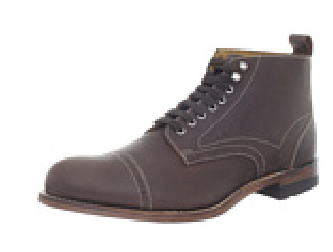

In [5]:
# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required = True, help = "Path to the image")
ap.add_argument("-c", "--clusters", required = True, type = int,
    help = "# of clusters")
#args = vars(ap.parse_args())
 
# load the image and convert it from BGR to RGB so that
# we can dispaly it with matplotlib
#image = cv2.imread(args["image"])
img_path = "C:\\Users\jason\\UT\Junior_1st_Semester\EE_460J\\finalProject\DataScienceFinalProject\Formals\\102170.216.jpg"

image = cv2.imread(str(img_path))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# show our image
plt.figure()
plt.axis("off")
plt.imshow(image)

# reshape the image to be a list of pixels
image = image.reshape((image.shape[0] * image.shape[1], 3))

print("akjdfbakdbfja:" , image.shape)
# cluster the pixel intensities

#clt = KMeans(n_clusters = args["clusters"])
clt = KMeans(n_clusters=10)
clt.fit(image)

# build a histogram of clusters and then create a figure
# representing the number of pixels labeled to each color
hist = utils.centroid_histogram(clt)
bar = utils.plot_colors(hist, clt.cluster_centers_)

#ranks = rank_colors(hist, clt.cluster_centers_)
ranks = rank_colors_pixels_HSV2(image)
print(ranks)
'''
# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()
'''